In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"D:\practice projects\train_ctrUa4K.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
for column in data.columns:
    if data[column].dtype==object:
        print(str(column)+ " : "+str(data[column].unique()))
        print(data[column].value_counts())
        print('-------------------------------------')

Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP0012

In [7]:
data.shape

(614, 13)

In [8]:
# converting target column to numerical form
from sklearn.preprocessing import LabelEncoder

In [9]:
l_enc=LabelEncoder()

In [10]:
data['Loan_Status']=l_enc.fit_transform(data['Loan_Status'])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [11]:
# filling missing values of categorical column
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [12]:
# filling missing values of numerical column
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [13]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

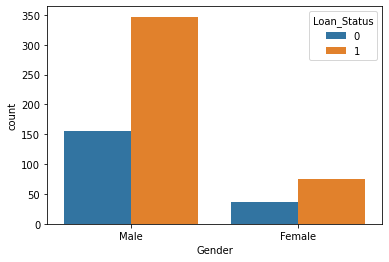

In [14]:
# exploratory data analysis of categorical columns
sns.countplot('Gender',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

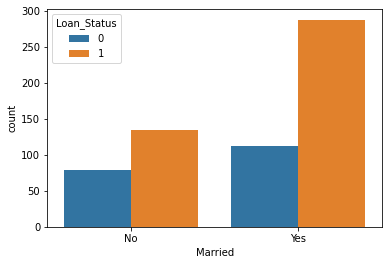

In [15]:
sns.countplot('Married',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

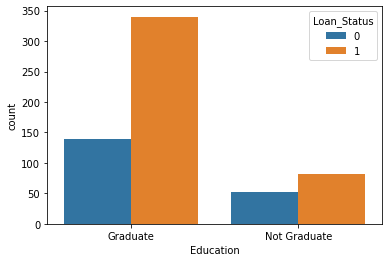

In [16]:
sns.countplot('Education',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

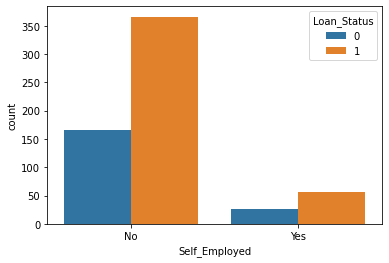

In [17]:
sns.countplot('Self_Employed',hue='Loan_Status',data=data)

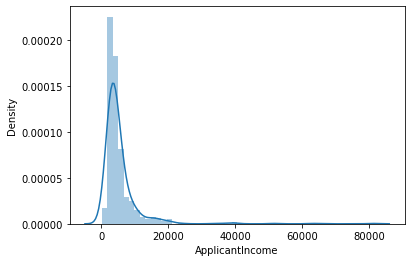

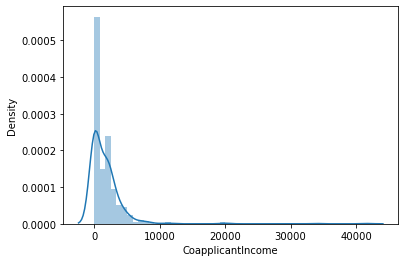

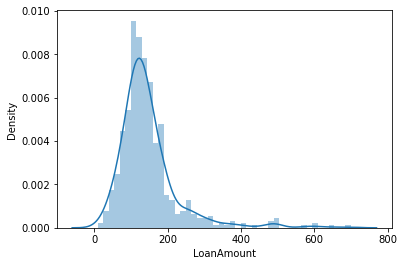

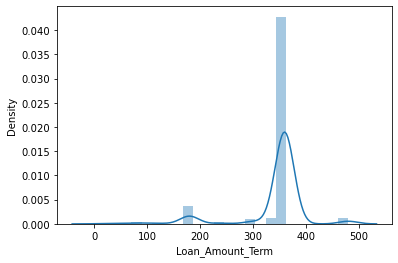

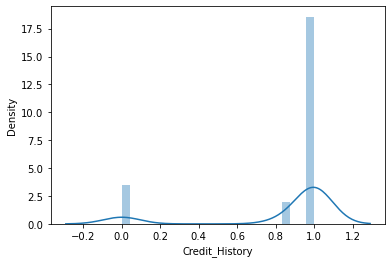

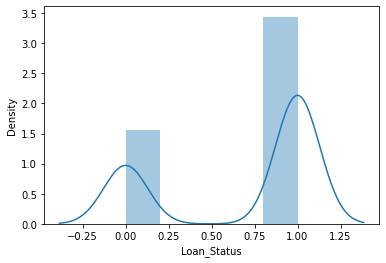

In [18]:
# exploratory data analysis of numerical columns
for column in data.columns:
    if data[column].dtype!=object:
        sns.distplot(data[column])
        plt.show()

In [19]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

In [20]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
# combine column to create new column
data['total_income']=data['ApplicantIncome']+data['CoapplicantIncome']
data['total_income']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: total_income, Length: 614, dtype: float64

In [22]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Loan_Status         -0.809998
total_income         5.633449
dtype: float64

In [23]:
# removing of outlier using iqr method
from scipy.stats import zscore
z_score=zscore(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','total_income']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score < 3).all(axis=1)

data=data[filtering_entry]

In [24]:
data.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Loan_Status         -0.822635
total_income         1.681856
dtype: float64

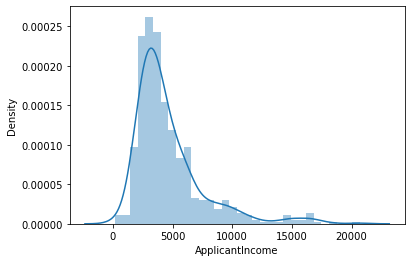

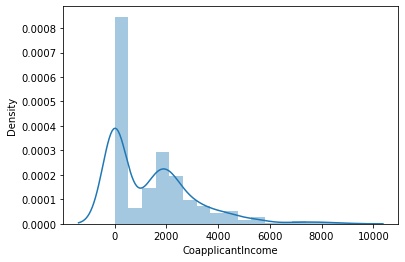

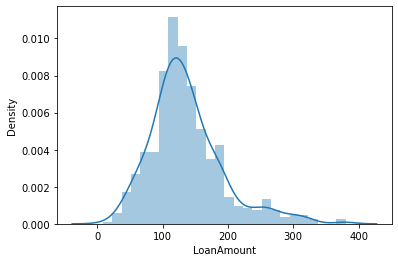

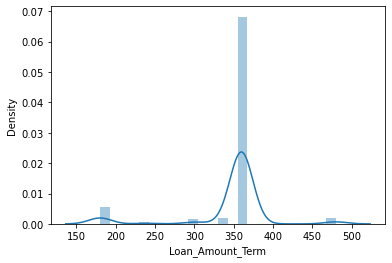

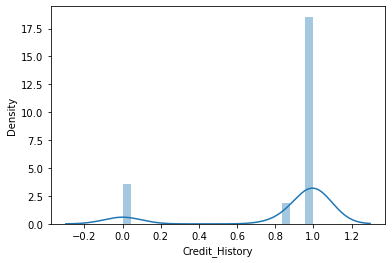

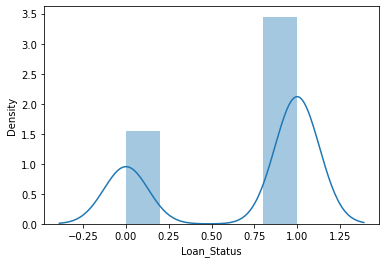

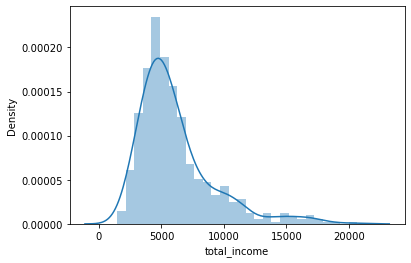

In [25]:
# exploratory data analysis of numerical columns
for column in data.columns:
    if data[column].dtype!=object:
        sns.distplot(data[column])
        plt.show()

In [26]:
data.drop(columns=['ApplicantIncome','CoapplicantIncome','Loan_ID'],axis=1,inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,1,2900.0
610,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,1,4106.0
611,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,1,8312.0
612,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,1,7583.0


In [27]:
data.skew()

LoanAmount          1.113132
Loan_Amount_Term   -2.077031
Credit_History     -1.921860
Loan_Status        -0.822635
total_income        1.681856
dtype: float64

<AxesSubplot:>

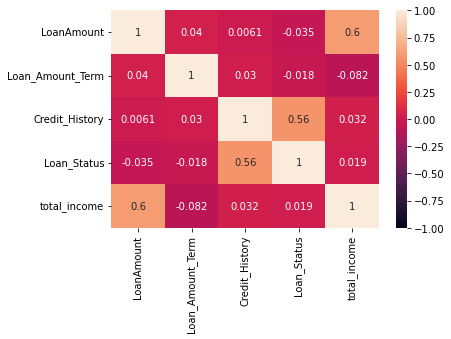

In [28]:
#coorelation matrix
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            577 non-null    object 
 1   Married           577 non-null    object 
 2   Dependents        577 non-null    object 
 3   Education         577 non-null    object 
 4   Self_Employed     577 non-null    object 
 5   LoanAmount        577 non-null    float64
 6   Loan_Amount_Term  577 non-null    float64
 7   Credit_History    577 non-null    float64
 8   Property_Area     577 non-null    object 
 9   Loan_Status       577 non-null    int32  
 10  total_income      577 non-null    float64
dtypes: float64(4), int32(1), object(6)
memory usage: 51.8+ KB


In [30]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [31]:
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for cols in data.columns:
    data[cols]=l_enc.fit_transform(data[cols])

In [32]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,1,0,0,0,0,98,4,2,2,1,314
1,1,1,1,0,0,79,4,2,0,0,327
2,1,1,0,0,1,24,4,2,2,1,41
3,1,1,0,1,0,71,4,2,2,1,232
4,1,0,0,0,0,92,4,2,2,1,321


In [33]:
x=data.drop(columns=['Loan_Status'])
y=data['Loan_Status']

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler=MinMaxScaler()

In [36]:
x_scaled=scaler.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=55)

In [39]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

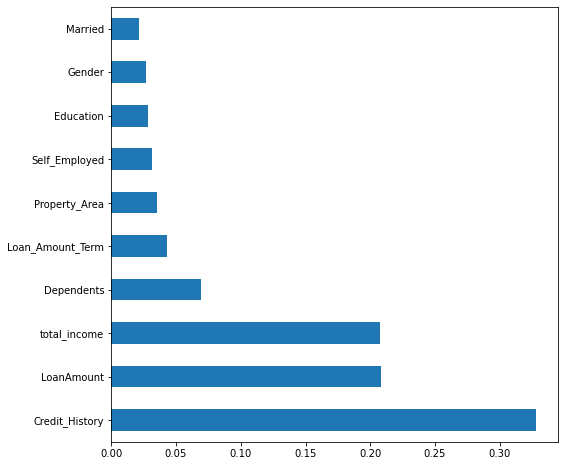

In [40]:
plt.figure(figsize=(8,8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr=LogisticRegression()

In [85]:
lr.fit(x_train,y_train)

LogisticRegression()

In [86]:
lr_pred=lr.predict(x_test)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy=accuracy_score(y_test,lr_pred)
accuracy

0.8448275862068966

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
lr_cv=cross_val_score(lr,x,y,cv=5,scoring='accuracy').mean()
lr_cv

0.8024437781109445

In [91]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [92]:
print(confusion_matrix(y_test,lr_pred))

[[ 28  22]
 [  5 119]]


In [93]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.56      0.67        50
           1       0.84      0.96      0.90       124

    accuracy                           0.84       174
   macro avg       0.85      0.76      0.79       174
weighted avg       0.85      0.84      0.83       174



In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn=KNeighborsClassifier()

In [96]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [97]:
knn_pred=knn.predict(x_test)

In [98]:
accuracy=accuracy_score(y_test,knn_pred)
accuracy

0.8390804597701149

In [99]:
knn_cv=cross_val_score(knn,x,y,cv=5,scoring='accuracy').mean()
knn_cv

0.6568215892053973

In [100]:
from sklearn.svm import SVC

In [101]:
svc=SVC()

In [102]:
svc.fit(x_train,y_train)

SVC()

In [103]:
svc_pred=svc.predict(x_test)

In [104]:
accuracy=accuracy_score(y_test,svc_pred)
accuracy

0.867816091954023

In [105]:
svc_cv=cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()
svc_cv

0.6897751124437781

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dt=DecisionTreeClassifier()

In [108]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [109]:
dt_pred=dt.predict(x_test)

In [110]:
accuracy=accuracy_score(y_test,dt_pred)
accuracy

0.7241379310344828

In [111]:
dt_cv=cross_val_score(dt,x,y,cv=5,scoring='accuracy').mean()
dt_cv

0.7002998500749625

In [112]:
print(confusion_matrix(y_test,dt_pred))

[[32 18]
 [30 94]]


In [113]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [114]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [115]:
rf_pred=rf.predict(x_test)

In [116]:
accuracy=accuracy_score(y_test,rf_pred)
accuracy

0.8275862068965517

In [117]:
rf_cv=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
rf_cv

0.7851574212893554

In [118]:
print(confusion_matrix(y_test,rf_pred))

[[ 29  21]
 [  9 115]]


In [119]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66        50
           1       0.85      0.93      0.88       124

    accuracy                           0.83       174
   macro avg       0.80      0.75      0.77       174
weighted avg       0.82      0.83      0.82       174



In [120]:
from sklearn.model_selection import GridSearchCV

In [136]:
# using Hypertunning parameter
lr=LogisticRegression()
lr.fit(x_train,y_train)
params=({'penalty':['l1','l2'], 'tol':[0.0001],'dual':[False],'fit_intercept':[True],'n_jobs':[1],'intercept_scaling':[1],})
grd=GridSearchCV(lr,param_grid=params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'dual': [False], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'n_jobs': [1],
                         'penalty': ['l1', 'l2'], 'tol': [0.0001]})

In [129]:
best_parameters=grd.best_params_
print(best_parameters)

{'dual': False, 'fit_intercept': True, 'n_jobs': 1, 'penalty': 'l2', 'tol': 0.0001}


In [130]:
grd.best_score_

0.7666975308641975

In [131]:
from sklearn.metrics import plot_roc_curve

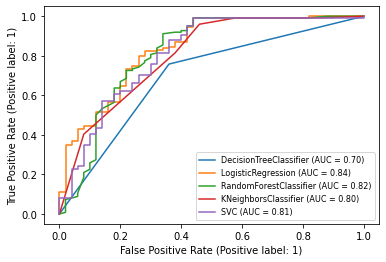

In [132]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':8},loc='lower right')
plt.show()

In [137]:
lr.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)